# **Normalización y Estandarización con Scikit-learn**




---
---

### **Estandarización y Normalización**

Los algoritmos de Machine Learning (ML) suelen sensibles a la escala de los datos, a la magnitud de los valores. Por ello, es necesario transformar adecuadamente las características numéricas antes del entrenamiento. Las dos técnicas más comunes para esto son:

-  Normalización (Min-Max Scaling).

-  Estandarización (Z-score Scaling).

Los procesos de normalización y estandarización deben implementarse solo cuando sea necesario pues se puede modificar los datos y su forma de interpretación.

Los datos solamente pueden ser estandarizados si siguen una distribución que tiende a ser normal, por ello, primeramente se normalizan.


---

### **Normalización con scikit-learn**

Recordemos que uno de los requisitos que deben tener las bases de datos para implementar modelos de ML con Python es que deben estar bajo un formato de dataframe de Pandas.

La normalización o método Min-Max Scaling con scikit-learn, normaliza los valores de una columna del dataframe mediante la ecuación:

$$
(x_i)_{\text{norm}}=\frac{x_i - x_{min}}{x_{max}-x_{min}} \in [-1,1]
$$

En donde $x_{min}$ es el valor mínimo presente en la columna, y $x_{max}$ el más grande.

La sintaxis para normalizar una columna de un dataframe de Pandas con el módulo sklearn.preprocessing es:

    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df['col'] = scaler.fit_transform(df[['col']])

---

### **Estandarización con scikit-learn**

La estandarización o método Z-score Scaling con scikit-learn de los valores de la columna normalizada (pues la hemos hecho seguir una discribución que tiende a ser normal), es mediante la ecuación:

$$
z_i=\frac{x_i - μ}{σ}
$$

En donde $\mu$ es el promedio asociado a la columna, y $σ$ la desviación estándar.

La sintaxis es:

    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    df['col'] = scaler.fit_transform(df['col'])

---

### **Escalar evitando la fuga de datos**

StandardScaler() también se puede trabajar sobre las [divisiones del conjunto de datos](https://github.com/Bronquivoide/Machine_Learning_Fundamentals/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado%20con%20Scikit-learn.pdf) (train y test), evitando así la fuga de datos.


La fuga de datos ocurre cuando se utilizan datos que no corresponden al conjunto de entrenamiendo para entrenar el modelo, por ejemplo, puede llegar a usarse el test set ya sea durante el propio entrenamiento del modelo o durante las etapas de preprocesamiento que afectan al entrenamiento, lo cual genera un modelo que no generaliza bien, un modelo poco robusto.

Por las razones anteriores es que se suele dividir el conjunto de datos en training y test antes de la imputación o del escalamiento de valores.

La sintaxis para escalar evitando la fuga de datos es:


    from sklearn.model_selection import train_test_split
    from sklearn.module import Model

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
    model = Model()
    scaler = StandardScaler()

    #Calculamos y aplicamos el escalado al conjunto de entrenamiento:
    X_train_scaled = scaler.fit_transform(X_train)

    #Usamos los parámetros aprendidos en el entrenamiento para escalar el conjunto de prueba:
    X_test_scaled = scaler.transform(X_test)
    #Nota: Nunca se ajusta el escalador sobre el test set

    model.fit(X_train_scaled, y_train)
    model.score(X_test_scaled, y_test)



---
### **Normalización o transformación logarítmica**

Comunmente cuando se tiene un dataframe en Pandas con una columna a cuyos datos se le asocia una varianza grande con respecto a las demás columnas, transformamos cada una de estas características de la siguiente forma:

$$
x →log(x)
$$

La sintaxis para un dataframe de Pandas es:

    import numpy as np
    import pandas as pd

    #Checando la varianza de cada columna:
    df.var()

    #log-transform para una columna arbitraria con una varianza alta:
    df['columna_log'] = np.log(df['columna'])



---

### **Ejemplo: insurance.csv**

Ejemplificaremos el proceso de normalización y estandarización en scikit-learn mediante una base de datos sobre un seguro médico.

Un problema que se puede abordar con este dataset es el de analizar el costo total de un seguro médico.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/Preprocesamiento/insurance.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(file_path)
display(df.head())
print('------------------------')

display(df.dtypes)
print('------------------------')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


------------------------


,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


------------------------


#### La pregunta es, ¿qué datos numéricos necesitarían ser normalizados y estandarizados?

### **Detección de outliers: Boxplots**



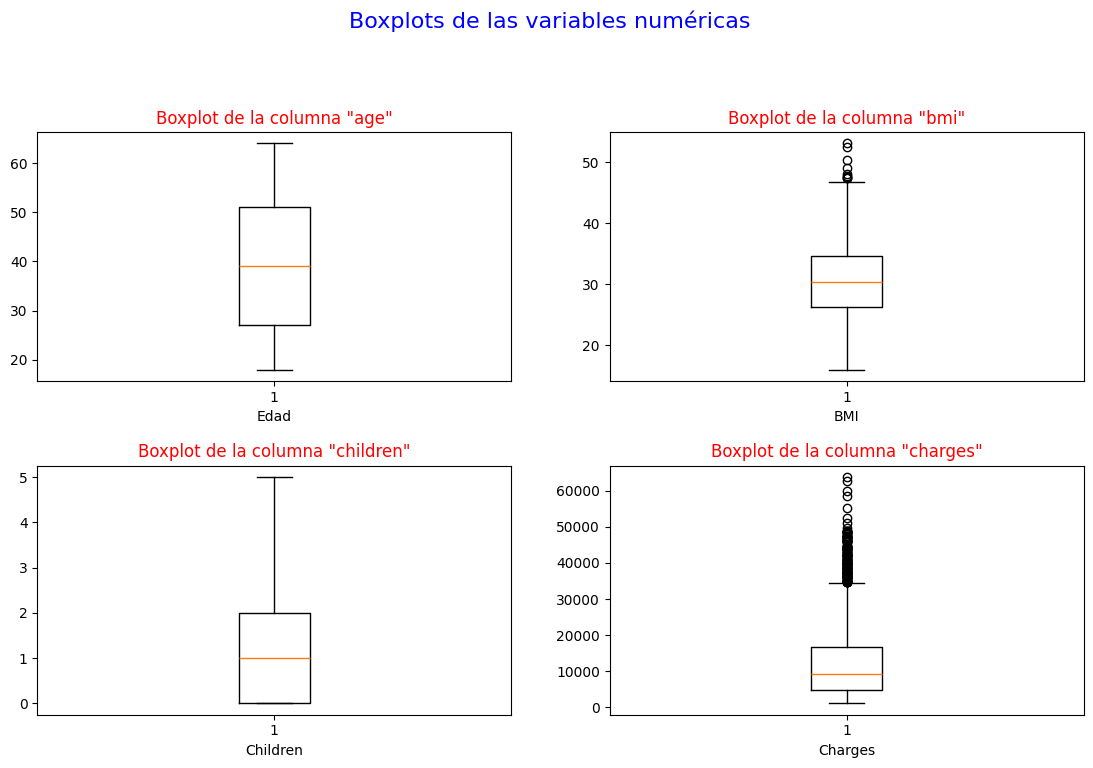

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Boxplots de las variables numéricas', fontsize=16, color='b')
plt.tight_layout(pad=4.0)


#age
axs[0, 0].boxplot(df['age'])
axs[0, 0].set_title('Boxplot de la columna "age"', color='r')
axs[0, 0].set_xlabel('Edad')

#bmi
axs[0, 1].boxplot(df['bmi'])
axs[0, 1].set_title('Boxplot de la columna "bmi"', color='r')
axs[0, 1].set_xlabel('BMI')

#children
axs[1, 0].boxplot(df['children'])
axs[1, 0].set_title('Boxplot de la columna "children"', color='r')
axs[1, 0].set_xlabel('Children')

#charges
axs[1, 1].boxplot(df['charges'])
axs[1, 1].set_title('Boxplot de la columna "charges"', color='r')
axs[1, 1].set_xlabel('Charges')


plt.show()



### **¿Qué hacer con los outliers?**

-  Las columnas cuyos valores son de formato numérico y presentan outliers son BMI y Charges.

-  Quitar estos valores puede hacer que se pierda información valiosa para poder analizar el costo total de un seguro médico, por ello, en este caso no es una buena opción eliminar estos valores.

-  Se puede estandarizar la columna para evitar los outliers. La estandarización puede mejorar la comparación de los datos para introducirlos a un modelo sensible a outliers como **K-means**, aunque los datos pueden ser más complicados de interpretar.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Normalización de los valores de las columnas 'charges' y 'bmi':
scaler1 = MinMaxScaler()
df[['charges', 'bmi']] = scaler1.fit_transform(df[['charges', 'bmi']])

#Estandarización de los valores de las columnas 'charges' y 'bmi':
scaler2 = StandardScaler()
df[['charges', 'bmi']] = scaler2.fit_transform(df[['charges', 'bmi']])


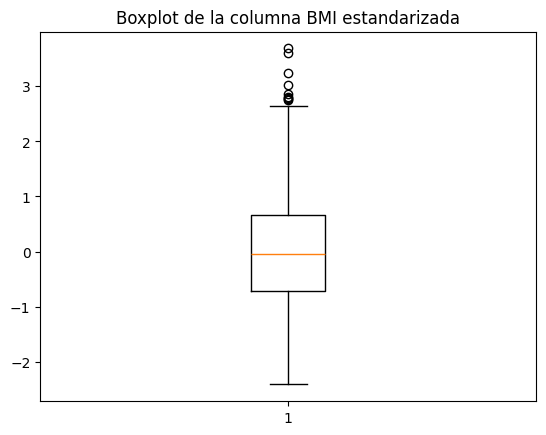

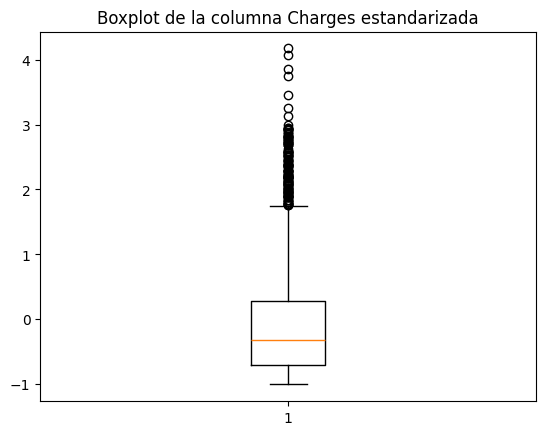

In [ ]:
plt.boxplot(df['bmi'])
plt.title('Boxplot de la columna BMI estandarizada')
plt.show()

plt.boxplot(df['charges'])
plt.title('Boxplot de la columna Charges estandarizada')
plt.show()

Las columnas 'bmi' y 'charges' siguen presentado outliers, por lo que estos datos pueden ser errores de imputación o ser datos extremadamente atípicos que aún es importante mantener, pues como se mencionó, estos datos pueden ser cruciales para obtener información sobre los costos del seguro.

In [ ]:
df['log_charges'] = np.log(df['charges'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df.query('charges <0').shape

(918, 8)